<a href="https://colab.research.google.com/github/adelriscom/DataScience/blob/main/futsal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import seaborn as sns

In [19]:
ft = pd.read_csv('/content/drive/MyDrive/DataScience_UWinnipeg/1era_división_España_Scoutear.csv')
ft.head(5)


,EQUIPOS,TORNEO,RUEDA,FASE DEL TORNEO,EQUIPO QUE CONVIERTE,EQUIPO AL QUE LE CONVIERTEN,INICIO JUGADA,FINALIZACIÓN CON GOL,DURACIÓN TOTAL DE LA JUGADA,SITUACIÓN DE JUEGO,...,ZONA DEL PASE GOL,ZONA DE FINALIZACIÓN,LADO CANCHA - FINALIZACIÓN,ZONA DEL ARCO,SUBDIVISIÓN ARCO,SUPERFICIE DE CONTACTO,TIPO DE GOLPE,PIE,DEFINICIÓN,Unnamed: 23
0,Teldeportivo (TEL),1era División 22/23,Primera vuelta,Fecha 1,Futsi (FSI),Teldeportivo (TEL),NaN,NaN,NaN,Atq. Posicional (AP),...,Z3,Z4,Derecho,NaN,NaN,Borde Interior (BI),Primera intención - Un toque,Derecho,NaN,NaN
1,Futsi (FSI),1era División 22/23,Primera vuelta,Fecha 1,Teldeportivo (TEL),Futsi (FSI),NaN,NaN,NaN,Atq. Posicional (AP),...,Z5,Z2,Derecho,NaN,NaN,Borde Interior (BI),Primera intención - Un toque,Derecho,Pared + Finalización,NaN
2,LBTL Futsal (LBTL),1era División 22/23,Primera vuelta,Fecha 1,Futsi (FSI),Teldeportivo (TEL),NaN,NaN,NaN,ABP,...,Z4,Z1,Derecho,NaN,NaN,Tacón,Primera intención - Un toque,Izquierdo,Tacón - Desajuste defensivo,NaN
3,Móstoles (MOS),1era División 22/23,Primera vuelta,Fecha 1,Futsi (FSI),Teldeportivo (TEL),NaN,NaN,NaN,Rebote/Rechace (RE),...,-,Z2,Izquierdo,NaN,NaN,Cabeza,Primera intención - Un toque,-,NO CONTABILIZAR,NaN
4,Ourense (OUR),1era División 22/23,Primera vuelta,Fecha 1,Futsi (FSI),Teldeportivo (TEL),NaN,NaN,NaN,Atq. Posicional (AP),...,Z3,Z2,Izquierdo,NaN,NaN,Borde Interior (BI),Primera intención - Un toque,Derecho,2do Palo,NaN


In [20]:
ft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   EQUIPOS                               16 non-null     object
 1   TORNEO                                718 non-null    object
 2   RUEDA                                 718 non-null    object
 3   FASE DEL TORNEO                       718 non-null    object
 4   EQUIPO QUE CONVIERTE                  718 non-null    object
 5   EQUIPO AL QUE LE CONVIERTEN           718 non-null    object
 6   INICIO JUGADA                         352 non-null    object
 7   FINALIZACIÓN CON GOL                  351 non-null    object
 8   DURACIÓN TOTAL DE LA JUGADA           392 non-null    object
 9   SITUACIÓN DE JUEGO                    718 non-null    object
 10  ETIQUETA/LEYENDA                      718 non-null    object
 11  TIEMPO DE JUEGO                 

In [24]:
ft.shape

(718, 24)

In [25]:
def check_variables(df: pd.DataFrame):
  cols = df.columns
  quantitative_cols = df._get_numeric_data().columns
  categorical_cols = list(set(cols) - set(quantitative_cols))
  return categorical_cols, list(set(quantitative_cols))

cat_cols, quan_cols = check_variables(ft)
print(f'categorical columns: {cat_cols}')
print(f'quantitative columns: {quan_cols}')

categorical columns: ['FINALIZACIÓN CON GOL', 'JUG. QUE INTERVIENEN EN LA ACCIÓN', 'SUBDIVISIÓN ARCO', 'PASES REALIZADOS EN LA JUGADA DE GOL', 'ETIQUETA/LEYENDA', 'TORNEO', 'FASE DEL TORNEO', 'EQUIPOS', 'ZONA DEL PASE GOL', 'ZONA DE FINALIZACIÓN', 'RUEDA', 'Unnamed: 23', 'PIE', 'EQUIPO AL QUE LE CONVIERTEN', 'TIPO DE GOLPE', 'ZONA DEL ARCO', 'EQUIPO QUE CONVIERTE', 'LADO CANCHA - FINALIZACIÓN', 'DURACIÓN TOTAL DE LA JUGADA', 'TIEMPO DE JUEGO', 'SITUACIÓN DE JUEGO', 'SUPERFICIE DE CONTACTO ', 'DEFINICIÓN', 'INICIO JUGADA']
quantitative columns: []


In [26]:
ft['FINALIZACIÓN CON GOL'].describe()

count                         351
unique                        253
top       no se pudo contabilizar
freq                           32
Name: FINALIZACIÓN CON GOL, dtype: object

# Mostrar Cancha


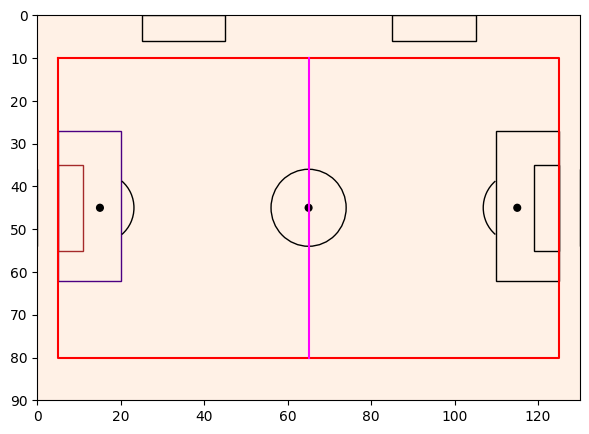

In [156]:
def createPitch():
    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(7, 5)) 
    
    
    # Set background color with alpha transparency
    ax.set_facecolor('C1')
    ax.patch.set_alpha(0.1)
    
    # Set axis limits and invert y-axis
    ax.set_xlim(0, 130)
    ax.set_ylim(0, 90)
    ax.invert_yaxis()
    
    # Prepare pitch boundaries
    plt.plot([5, 125, 125, 5, 5], [10, 10, 80, 80, 10], color='Red')
    plt.plot([65,65],[10,80], color="magenta")

    
    
    # Prepare center circle
    center_circle = plt.Circle((65, 45), 9, color='black', fill=False)
    ax.add_patch(center_circle)
    
    # Prepare penalty areas
    left_penalty = plt.Rectangle((5, 27), width=15, height=35, fill=False, color='indigo')
    right_penalty = plt.Rectangle((110, 27), width=15, height=35, fill=False, color='black')
    ax.add_patch(left_penalty)
    ax.add_patch(right_penalty)

    #prepare seats
    left_seat = plt.Rectangle((25, 0), width=20, height=6, fill=False, color='black')
    right_seat = plt.Rectangle((85, 0), width=20, height=6, fill=False, color='black')
    ax.add_patch(left_seat)
    ax.add_patch(right_seat)

    # Prepare goal areas
    left_goal = plt.Rectangle((5, 35), width=6, height=20, fill=False, color='brown')
    right_goal = plt.Rectangle((119, 35), width=6, height=20, fill=False, color='black')
    ax.add_patch(left_goal)
    ax.add_patch(right_goal)
    
    # Prepare goal posts
    left_post = plt.Rectangle((-1, 36), width=1, height=18, fill=False, color='black')
    right_post = plt.Rectangle((130, 36), width=1, height=18, fill=False, color='black')
    ax.add_patch(left_post)
    ax.add_patch(right_post)
    
    # Prepare Arcs
    leftArc = Arc((15, 45), height=16.3, width=16.3, angle=0, theta1=310, theta2=50, color="black")
    rightArc = Arc((115, 45), height=16.3, width=16.3, angle=0, theta1=130, theta2=230, color="black")
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

    #Prepare Circles
    centreSpot = plt.Circle((65,45),0.8,color="black")
    leftPenSpot = plt.Circle((15,45),0.8,color="black")
    rightPenSpot = plt.Circle((115,45),0.8,color="black")
    #Draw Circles
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)
    
    # Show the pitch
    plt.show()

createPitch()
